# Notebook 2: D&B forward run

In this notebook, we will forward run the D&B model and do some simple analysis \
This training will focus on two ecological sites:
1) **ES-LM1** at Las Majadas de Tietar, Spain (lon: -5.778625, lat: 39.942628): *evergreen* + *grass*
2) **FI-Sod** at Sodankylä, Finland (lon: 26.64, lat: 67.36): *conifer* + *shrub*

# Setup working environment

Fortunately, we don't need to repeat everything in the last notebook.\
Necessary setup processes are modulised in the `env_setup` script.\
So all we need to do is importing it.

In [2]:
!pip install git+https://github.com/soonyenju/tccas.git -U --quiet

  Preparing metadata (setup.py) ... done


In [3]:
from tccas.env_setup import *

Mounted at /content/drive
Copying /content/drive/My Drive/tccas/tccas_r10043.tgz -> /content/tccas_r10043.tgz
Extracting /content/tccas_r10043.tgz
Linking /content/tccas_r10043/config/mk.compile-gfortran -> /content/tccas_r10043/mk.compile
✅ TCCAS prepared successfully!
No module named 'netCDF4', so `netCDF4` is installing it for you...


# Forward run D&B

Good so far!

Now we are going to do forward run separately for the two sites and save the output data into the `resources` folder.\
As they are forward runs using given prior parameters, we name the outputs with a suffix of *prior*.


This subsection include two lines:
1) forward run with specific site name
2) copy the diagnostic outputs into the *resources* folder we created above.

---

Note:

The `scratch` target makes sure that the configuration previously used is removed. `ES-LM1` means the selected site, the other option is `FI-Sod`.\
The system has also stored a vector of synthetic observations in binary format in the file `obs.b` that it placed in the main directory.

In [4]:
%%bash

make scratch xmodel -s DOMAIN=ES-LM1
cp -a diagout/. resources/ES-LM1_prior

INFO::  prepending +++/content/tccas_r10043/util/pylcc+++ to module search path
2025-09-22 05:04:23,571 INFO::<module>:: model_setup.py::PROGRAM START::2025-09-22T05:04:23.571709
2025-09-22 05:04:23,571 INFO::<module>:: command-line: util/model_setup.py dimensions_setup --outname src/dimensions.f90 --calendar=gregorian --dates 20150101 20211231 input/staticforcing.nc input/dynforcing.nc
2025-09-22 05:04:23,575 INFO::main:: START requested subcommand +++dimensions_setup+++...
2025-09-22 05:04:23,575 INFO::subcmd_dimensions_setup:: determine temporal/spatial settings from forcing file ***input/staticforcing.nc***
2025-09-22 05:04:23,587 INFO::subcmd_dimensions_setup:: static forcing file contains grid-cells with 2 different PFTs (---[3 9]---)
2025-09-22 05:04:23,587 INFO::subcmd_dimensions_setup:: checking consistency of selected period with dynamic forcing provided (input/dynforcing.nc)
2025-09-22 05:04:23,588 INFO::subcmd_dimensions_setup:: simulation period forseen 20150101T01--202201

## ES-LM1

This is what some output information looks like.\
This section provides statistics on the number of data per data stream and on the data uncertainty.\
It combines the uncertainty estimates in the observational products with an uncertainty estimate reflecting model error (see Section 5.1.2 in the Manual).\
How many data streams are being simulated? Which data stream provides the largest # of observations?

---

## FI-Sod

In [5]:
%%bash

make scratch xmodel -s DOMAIN=FI-Sod
cp -a diagout/. resources/FI-Sod_prior

INFO::  prepending +++/content/tccas_r10043/util/pylcc+++ to module search path
2025-09-22 05:04:52,694 INFO::<module>:: model_setup.py::PROGRAM START::2025-09-22T05:04:52.694758
2025-09-22 05:04:52,694 INFO::<module>:: command-line: util/model_setup.py dimensions_setup --outname src/dimensions.f90 --calendar=gregorian --dates 20150101 20211231 input/staticforcing.nc input/dynforcing.nc
2025-09-22 05:04:52,698 INFO::main:: START requested subcommand +++dimensions_setup+++...
2025-09-22 05:04:52,698 INFO::subcmd_dimensions_setup:: determine temporal/spatial settings from forcing file ***input/staticforcing.nc***
2025-09-22 05:04:52,702 INFO::subcmd_dimensions_setup:: static forcing file contains grid-cells with 2 different PFTs (---[5 7]---)
2025-09-22 05:04:52,703 INFO::subcmd_dimensions_setup:: checking consistency of selected period with dynamic forcing provided (input/dynforcing.nc)
2025-09-22 05:04:52,703 INFO::subcmd_dimensions_setup:: simulation period forseen 20150101T01--202201

How about the *FI-Sod* site?

---

# D&B forward run outputs

## Description

D&B forward run has two types of output: 1) command-line information that we've seen above and 2) output data files

Each forward run will generate the following output files in the `tccas_r10043/diagout` folder.

- four parameter csv files (lvod, sif, and slope are Earth observations), which are copied just from the input directory. \
We put them here, so we recall which parameter values have created the output.
- two data outputs

## D&B data output format and structure

D&B data outputs are stored as netCDF files. *NetCDF* is commonly used and efficient for data storage and distribution.\
The two *netCDF* files are named in the following convention: `dalec-bethy_<freq>-output_20150101-20211231.nc`

<!-- Some variables, e.g. GPP, are simulated at an hourly time step.\
A subset of these is written to the hourly output file: "dalec-bethy_hourly-output_20150101-20211231.nc".\
Other variables, e.g. soil moisture, are simulated at a daily time step.\
A subset of these is written to the daily output file "dalec-bethy_daily-output_20150101-20211231.nc".\
The daily output file also contains aggregated/averaged output for some of the variables that are simulated at hourly time step. -->
The model runs are performed at an hourly time step.\
A subset of the variables is written to the hourly output file: "dalec-bethy_hourly-output_20150101-20211231.nc".\
Another subset of the variables are written to the daily output file "dalec-bethy_daily-output_20150101-20211231.nc".\
The daily output file contains aggregated/averaged output.

However, we will convert it to Pandas **dataframe** that can be easily accessed via e.g., Excel for analysis and plotting.\
Don't worry, it will be done automatically using the `functions.py` script.

----

## Supplementary information:

Earth observation streams:

- Surface layer soil moisture (SM)
- Fraction of Photosynthetically Active Radiation (FAPAR)
- Solar-Induced Fluorescence (SIF)
- L-Band Vegetation Optical Depth (L-VOD)
- Slope of ASCATbackscatter–incidence angle relationship (Slope)

# Load D&B output data

Select the site you want to explore by giving the site name `ES-LM1` or `FI-Sod` as the cell below.

The `load_DB_outputs` function accepts the site name (`site`), data location (`root_proj`),\
prior or posterior runs (`True` or `False`), and the frequency of interest (`daily` or `hourly`).

It returns two data frames/tables for the two different plant function types (PFTs):

|PFT# | Shortname | Description |
|-|-|-|
|1 |TrEV |Tropical broadleaf evergreen tree |
|2 |TrDD |Tropical broadleaf deciduous tree
|3 |**TmEv** |Temperate broadleaf evergreen tree
|4 |TmSg |Temperate broadleaf deciduous tree
|5 |**EvCn** |Evergreen coniferous tree
|6 |SgCn |Deciduous coniferous tree
|7 |**EShr** |Evergreen shrub
|8 |DShr |Deciduous shrub
|9 |**C3Gr** |C3 grass
|10 |C4Gr |C4 grass
|11 |TunV |Tundra
|12 |WetV |Wetland
|13 |ArbC |Arable crop


Below the next cell is what a data frame looks like, you can print it freely by type `dfa1` or `dfa2` in a new cell or at the bottom of an existing cell.

In [6]:
# site = 'ES-LM1'
site = 'FI-Sod'
dfa1, dfa2 = load_DB_outputs(site, root_proj, prior = True, freq = 'daily').values()
dfa1

,lon,lat,gidx,pft,pft_fraction,fc,tl_c,ga,fpasm,dprecip,...,resh,lai,labile_biomass,foliar_biomass,woody_biomass,soil_organic_matter,vod,slope,fapar,sif743
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,26.638583,67.362389,1.0,5.0,0.67,1.0,0.444375,0.16681,0.0,0.000139,...,0.858212,0.811030,30.476391,29.289239,3071.852572,40910.206832,0.597616,-0.103812,0.0,0.0
2015-01-02,26.638583,67.362389,1.0,5.0,0.67,1.0,0.444400,0.16681,0.0,0.000444,...,0.916642,0.810969,30.474516,29.287052,3071.459291,40910.026921,0.734762,-0.103812,0.0,0.0
2015-01-03,26.638583,67.362389,1.0,5.0,0.67,1.0,0.444427,0.16681,0.0,0.002528,...,0.787993,0.810921,30.473065,29.285309,3071.068012,40909.925472,0.452930,-0.103813,0.0,0.0
2015-01-04,26.638583,67.362389,1.0,5.0,0.67,1.0,0.444449,0.16681,0.0,0.000000,...,0.540159,0.810893,30.472324,29.284288,3070.680039,40909.976471,0.253002,-0.103813,0.0,0.0
2015-01-05,26.638583,67.362389,1.0,5.0,0.67,1.0,0.444461,0.16681,0.0,0.000000,...,0.269167,0.810880,30.472135,29.283832,3070.294655,40910.194685,0.247985,-0.103813,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,26.638583,67.362389,1.0,5.0,0.67,1.0,0.478011,0.16681,0.0,0.000000,...,0.464487,0.738096,30.486786,26.655320,3971.419124,40192.798572,0.311133,-0.103313,0.0,0.0
2021-12-28,26.638583,67.362389,1.0,5.0,0.67,1.0,0.478023,0.16681,0.0,0.000472,...,0.524259,0.738069,30.486277,26.654349,3970.919479,40193.063653,0.311130,-0.103313,0.0,0.0
2021-12-29,26.638583,67.362389,1.0,5.0,0.67,1.0,0.478036,0.16681,0.0,0.000778,...,0.869084,0.738022,30.485014,26.652671,3970.416428,40193.175789,0.367885,-0.103313,0.0,0.0


The PFT columns is encoded, we can use the cell below to retrieve the name of each PFT:

In [7]:
pft_codes = ['NoVeg', 'TrEv', 'TrDD','TmEv','TmSg', 'EvCn', 'SgCn', 'EShr', 'DShr', 'C3Gr', 'C4Gr', 'Tun', 'VSwamp', 'ArbC']
pft_dict = dict(zip(np.arange(len(pft_codes)), pft_codes))

print(f"dfa1 plant function type: {pft_dict[int(dfa1['pft'].drop_duplicates().values)]}")
print(f"dfa2 plant function type: {pft_dict[int(dfa2['pft'].drop_duplicates().values)]}")

dfa1 plant function type: EvCn
dfa2 plant function type: EShr


# Let's do some plots!

Choose the database you want to play with, hourly or daily database.

I would suggest we start from daily, otherwise you may want to tweak the code below :)

But it's upto you, just play with it!

Let's do some simple plot of GPP (photosynthesis) and save it in the `analysis` folder.

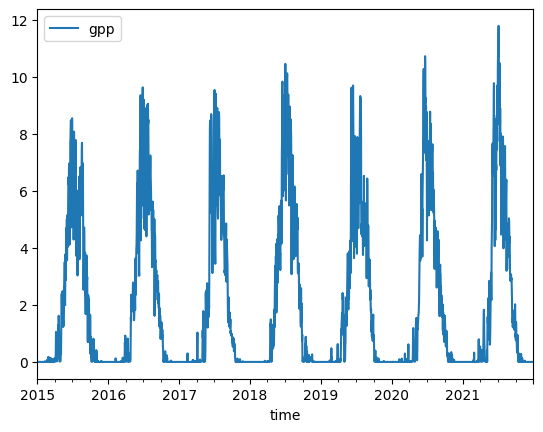

In [8]:
dfa1[['gpp']].plot()
# Save the figure
fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/gpp-timeseries.png'))

Looks not bad, hmmmm

What about the statistical distribution of it?

Do you think it will be Gaussian?

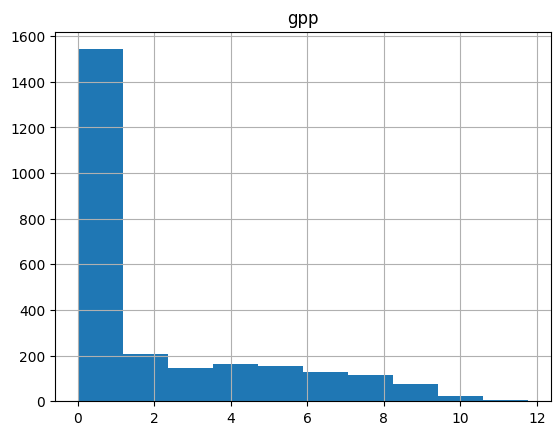

In [9]:
dfa1[['gpp']].hist()
fig = plt.gcf()
fig.savefig(root_proj.joinpath('analysis/gpp-hist.png'))

# Practices and questions <a class="anchor" id="section4"></a>

Probably not...

It seems too simple isn't it? How about we compare the two plant functional types?\
What about other fluxes?\
What about other PFTs and site?

This gets a little bit complex, but don't worry, take a breath, I'm sure you will be ok!